# 4.1 Assessing Dimentionality

We first start with activating the environment and import the required R and Python packages.
Since we already set up and tested our environment in the first session, everything should work smoothly.


---

<details>
<summary>   Workaround for PATH issues locating R </summary>

If your environment is not functioning properly, you may need to uninstall Miniconda and carefully follow the [1.1 Installation](../../introduction/1_psy126/1_Setup.md) guide.

As a temporary workaround, you can copy and run the following code cell at the beginning of your .ipynb notebook to ensure that rpy2 can locate a working version of R. Note that you'll need to repeat this each time you work with a new .ipynb notebook using rpy2.

Although not recommended, this will allow you to follow along with the seminar materials and exercises for now.

```python
import os
import subprocess
import glob

# Find the most recent version of R installed in the Program Files\R directory
r_base_path = r'C:\Program Files\R'
r_versions = glob.glob(os.path.join(r_base_path, 'R-*'))
r_versions.sort(reverse=True)
latest_r_version = r_versions[0]

# Set R environment variable
os.environ['R_HOME'] = latest_r_version

# Full path to the R executable
r_executable = os.path.join(latest_r_version, 'bin', 'R.exe')

# Install R packages
subprocess.run([r_executable, '-e', "install.packages(c('MPsychoR','mirt', 'Gifi', 'psych', 'eRm', 'ltm'), repos='https://cran.uni-muenster.de', quiet=TRUE)"], check=True)

```
</details> 

<details>
<summary>    Workaround for using Colab </summary>

At this point in the seminar, none of you should still be using Colab — the reason will become evident shortly.

While rpy2 can technically be used in Colab, doing so requires reinstalling all necessary R packages every time you open the notebook, refresh the browser, or reinitialize the kernel (whether intentionally or by accident).

This setup process takes a significant amount of time — roughly 15 minutes depending on Google’s server load — making it impractical for effective work.

However, if you still intend to use Colab for testing at home, you would need to run the following commands in your Colab-based Jupyter notebook:


```python
!R -e "install.packages(c('MPsychoR','mirt', 'mice', 'psych', 'eRm', 'ltm'), repos='https://cran.uni-muenster.de', quiet=TRUE)"
!pip install rpy2==3.5.17
```
</details> 

---



In [1]:
# General imports
import numpy as np
import pandas as pd

# Rpy2 imports
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Automatic conversion of arrays and dataframes
pandas2ri.activate()
numpy2ri.activate()

# Set random seed for reproducibility
ro.r('set.seed(123)')

# Ipython extenrsion for magix plotting
%load_ext rpy2.ipython

# R imports
importr('base')
importr('MPsychoR')
importr('Gifi')
importr('psych')
importr('stats')
importr('eRm')
importr('ltm')
importr('mirt')

c:\Users\maku1542\AppData\Local\miniconda3\envs\psy126\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


rpy2.robjects.packages.Package as a <module 'mirt'>

## 1. The dataset

To illustrate dimensionality assessment using these approaches, we consider a
dataset from Koller and Alexandrowicz (2010). They used the Neuropsychological
Test Battery for Number Processing and Calculation in Children (`ZAREKI`-R; von
Aster et al., 2006) for the assessment of dyscalculia in children. There are **n** **=**
**341** children (2nd to 4th year of elementary school) in their sample, eight items on
addition, eight items on subtraction, and two covariates (time needed for completion
in minutes as well as grade). In this example we consider *eight binary subtraction
items only*.

In [2]:
# Load the data in R
ro.r("data(zareki)")

# Get as DataFrame
zareki = pandas2ri.rpy2py(ro.globalenv['zareki'])

# Subset the df to only include items starting with "subtr"
sub_items = []
for col in zareki.columns:
    if col.startswith("subtr"):
        sub_items.append(col)

zarsub = zareki.loc[:, sub_items]
zarsub.head()

,subtr1,subtr2,subtr3,subtr4,subtr5,subtr6,subtr7,subtr8
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


### **Princals()**

We are interested in whether the subtraction items measure a single latent trait
or if multiple traits are needed. We start our dimensionality assessment with fitting
a two-dimensional Princals solution using the **Gifi** package (Mair and De Leeuw,
2017) in order to get a picture of item associations in a 2D space.

In [3]:
# Put data back into R
ro.globalenv['zarsub'] = zarsub

# Princals
ro.r("prinzar <- princals(zarsub)")
print(ro.r("summary(prinzar)"))


Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.623       
subtr3  0.565  0.119
subtr6  0.609 -0.153
subtr7  0.657       
subtr8  0.584 -0.194
subtr5  0.308 -0.787
subtr1  0.340  0.464
subtr4  0.500  0.398

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.3111  1.0723
VAF            28.8882 13.4040
Cumulative VAF 28.8900 42.2900

None



Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.623       
subtr3  0.565  0.119
subtr6  0.609 -0.153
subtr7  0.657       
subtr8  0.584 -0.194
subtr5  0.308 -0.787
subtr1  0.340  0.464
subtr4  0.500  0.398

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.3111  1.0723
VAF            28.8882 13.4040
Cumulative VAF 28.8900 42.2900



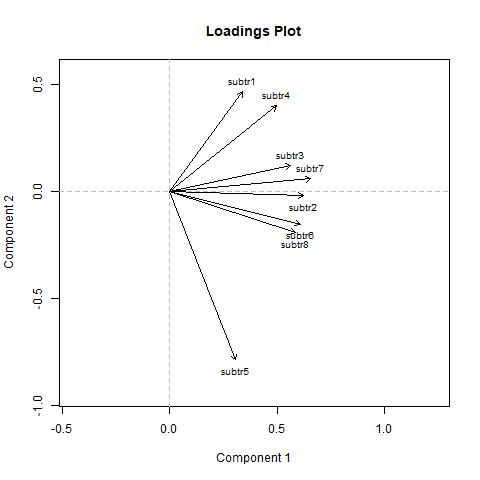

In [4]:
%%R
summary(prinzar)
plot(prinzar)

If the items were unidimensional,
the arrows should approximately point in the same direction or equally spreaded across the plotted space, showing no clustering. We see that
item `subtr5` is somewhat separated from the rest, whereas the remaining ones look
fairly homogeneous. This plot suggested that unidimensionality might be violated
due to `subtr5`. Therefore, we exclude `subtr5` and re-run the analysis:

In [5]:
# Remove subtr5 from the dataframe
zarsub2 = zarsub.drop("subtr5", axis=1)

# Put data back into R
ro.globalenv['zarsub2'] = zarsub2

# Princals
ro.r("prinzar <- princals(zarsub2)")
print(ro.r("summary(prinzar)"))


Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.622  0.132
subtr3  0.581 -0.449
subtr4  0.522       
subtr6  0.600 -0.172
subtr7  0.666 -0.199
subtr8  0.570  0.148
subtr1  0.360  0.818

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.2559  0.9838
VAF            32.2271 14.0541
Cumulative VAF 32.2300 46.2800

None


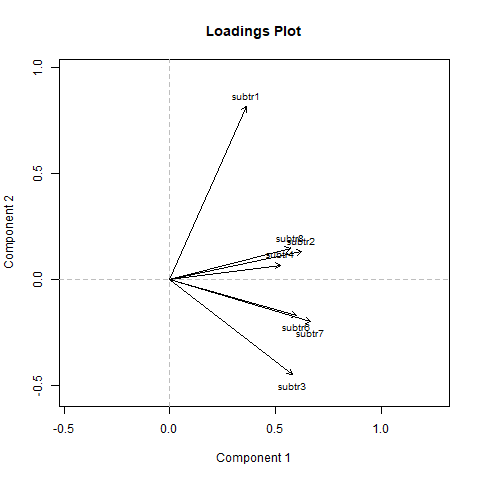

In [6]:
%%R
plot(prinzar)

Looking at the plot do you notice any additional item standing out from the group?

In [7]:
# subtr1 is separated from the rest, it should be removed
# Remove subtr1 from the dataframe
zarsub3 = zarsub2.drop("subtr1", axis=1)

# Put data back into R
ro.globalenv['zarsub3'] = zarsub3

# Princals
ro.r("prinzar <- princals(zarsub3)")
print(ro.r("summary(prinzar)"))


Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.619 -0.363
subtr3  0.608  0.375
subtr4  0.520  0.506
subtr6  0.612       
subtr7  0.676       
subtr8  0.570 -0.569

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.1797  0.8603
VAF            36.3284 14.3375
Cumulative VAF 36.3300 50.6700

None


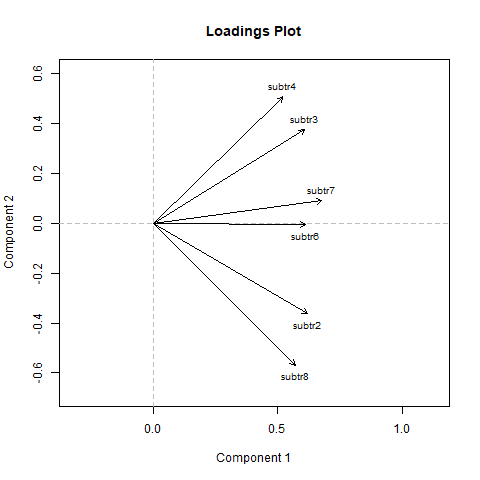

In [8]:
%%R
plot(prinzar)

Now items are well distributed, supporting evidence for unidimensionality. We can say that accordingly to our
categorical principal component analysis, we can assume unidimensionality.

### **EFA tetrachoric**

As a second tool, we use an EFA on the tetrachoric correlation matrix.
We utilize several criteria to assess dimensionality including:
- *Parallel Analysis*
- *Velicer's Minimum Average Partial (MAP)*
- *Very Simple Structure (VSS)*
- *Bayesian Information Criterion (BIC)*

These criteria help us identify the optimal number of latent dimensions that
best explain the relationships among our variables.

To conduct the `EFA` on the tetrachoric correlation matrix, we set the maximum
number of factors to two.

First, lets fit the model to all subtraction items.

In [21]:
# Perform EFA
ro.r("fa.parallel(zarsub, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")
efazar = ro.r("nfactors(zarsub, n=2, fm='ml', cor='tet')")
print(efazar)



Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


Number of factors
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = FALSE, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.77  with  2  factors
VSS complexity 2 achieves a maximimum of 0.83  with  2  factors
The Velicer MAP achieves a minimum of 0.03  with  1  factors 
Empirical BIC achieves a minimum of  -33.98  with  2  factors
Sample Size adjusted BIC achieves a minimum of  22.19  with  2  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq    prob sqresid  fit RMSEA   BIC SABIC complex
1 0.75 0.00 0.034  20   119 3.8e-16     3.8 0.75 0.121   2.7    66     1.0
2 0.77 0.83 0.061  13    57 2.0e-07     2.6 0.83 0.099 -19.1    22     1.2
  eChisq  SRMR eCRMS  eBIC
1    112 0.077 0.091  -4.3
2     42 0.047 0.069 -34.0



#### Interpretation
- **Parallel Analysis** <br>
    `Parallel analysis` compares the eigenvalues from your actual data with those obtained from randomly generated data of the same size. If your data’s eigenvalue is greater than the corresponding random one, that component is likely meaningful. The results from `fa.parallel()` reports that 2 components are found.
- **Velicer's Minimum Average Partial (MAP)** <br>
    `MAP` assesses the average partial correlation after extracting successive components. The number of components is optimal when the average partial correlation reaches its minimum.
- **Very Simple Structure (VSS)** <br>
    `VSS` checks how well a simplified factor structure (with only the largest loadings) reproduces the original correlation matrix. Higher values indicate a better fit.
- **Bayesian Information Criterion (BIC)** <br>
    `BIC` balances model fit and complexity. Lower BIC values indicate better models, penalizing overfitting.



Now we instead use the following code chunk to try the same steps on the dataset without
those items that violated unidimensionality. What do you notice? Are there any differences?

In [22]:
# Perform EFA
ro.r("fa.parallel(zarsub3, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")
efazar = ro.r("nfactors(zarsub3, n=2, fm='ml', cor='tet')")
print(efazar)


Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


Number of factors
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = FALSE, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.82  with  1  factors
VSS complexity 2 achieves a maximimum of 0.86  with  2  factors
The Velicer MAP achieves a minimum of 0.04  with  1  factors 
Empirical BIC achieves a minimum of  -42.93  with  1  factors
Sample Size adjusted BIC achieves a minimum of  -8.72  with  1  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq  prob sqresid  fit RMSEA BIC SABIC complex eChisq
1 0.82 0.00 0.044   9  15.2 0.085     2.1 0.82 0.045 -37  -8.7     1.0    9.6
2 0.69 0.86 0.116   4   5.3 0.260     1.6 0.86 0.031 -18  -5.4     1.2    3.3
   SRMR eCRMS eBIC
1 0.031 0.039  -43
2 0.018 0.035  -20





Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


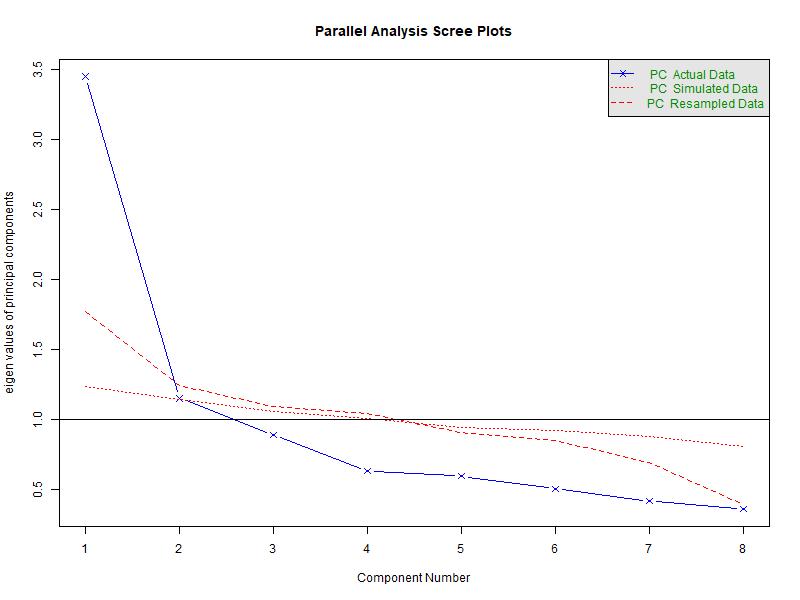

In [24]:
from rpy2.robjects.lib import grdevices
from IPython.display import Image, display

with grdevices.render_to_bytesio(grdevices.png, height=600, width=800) as img:
   ro.r("fa.parallel(zarsub, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")
display(Image(img.getvalue()))



Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


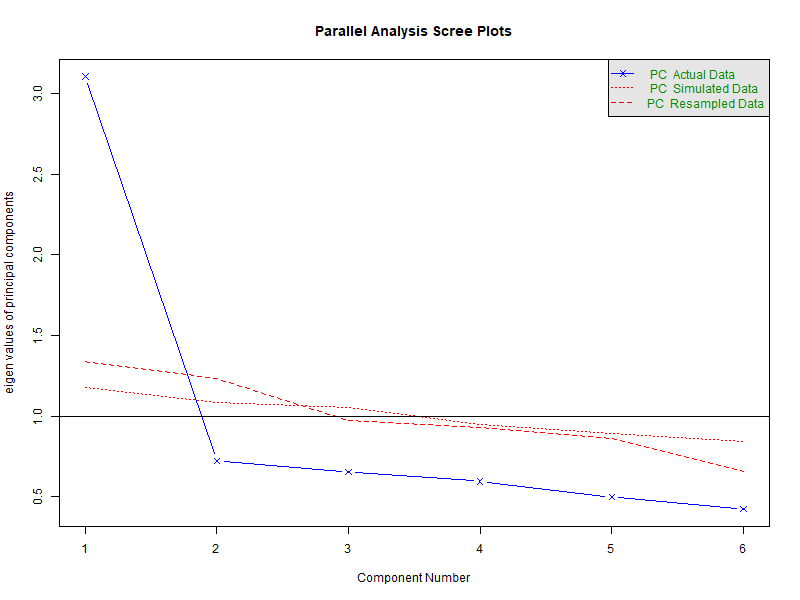



Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


In [25]:
with grdevices.render_to_bytesio(grdevices.png, height=600, width=800) as img:
   ro.r("fa.parallel(zarsub3, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")
display(Image(img.getvalue()))

ro.r("fa.parallel(zarsub3, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")

The Parallel Analysis suggests 1 factor, the VSS suggests two factors, the MAP one factor, and
the BIC two factors. As an additional diagnostic tool, a parallel analysis using the
fa.parallel function can be performed as well. Note that if the input items are
polytomous, setting cor="poly" does the job.

### **IFA**

As a third tool, let us use `IFA` as implemented in the `mirt` package (Chalmers,
2012). We fit a *one-factor* model and a *two-factor* model, and we compare these
nested fits via the `AIC`/`BIC` criteria.

In [ ]:
# Run IFA
fitifa1 = ro.r("mirt(zarsub, 1, verbose = FALSE, TOL = 0.001)")
print(fitifa1)

fitifa2 = ro.r("mirt(zarsub, 2, verbose = FALSE, TOL = 0.001)")
print(fitifa2)


Call:
mirt(data = zarsub, model = 1, TOL = 0.001, verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 0.001 tolerance after 15 EM iterations.
mirt version: 1.44.0 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -1263.202
Estimated parameters: 16 
AIC = 2558.405
BIC = 2619.715; SABIC = 2568.959
G2 (239) = 153.35, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN


Call:
mirt(data = zarsub, model = 2, TOL = 0.001, verbose = FALSE)

Full-information item factor analysis with 2 factor(s).
Converged within 0.001 tolerance after 72 EM iterations.
mirt version: 1.44.0 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 31
Latent density type: Gaussian 

Log-likelihood = -1257.625
Estimated parameters: 23 
AIC = 2561.249
BIC = 2649.383; SABIC = 2576.422
G2 (232) = 142.19, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN



AIC and BIC are (slightly) lower for the 1D solution, indicating a better fit for the 1D fit.

### Assessing dimensionality - Sum'ed up

Using all these tools in combination, we conclude that there is no drastic
unidimensionality violation in these data. Still, we obtained some hints that it might
be slightly violated. Princals gave a good indication that the items 5 and 1 may not behave
in the same way as the remaining items. The most straight forward approach is to exclude the items that violates unidimensionality.
Alternatively, in the case where numerous items are found to violate unidimensionality, there are also options for fitting a two-dimensional IRT model on the entire set of item, but we will not cover these approaches here.

### General remarks regarding fit assessment in IRT

IRT models can be used for several purposes. On the
one extreme, we can use IRT for scale construction. That is, we want to find a set of
“high-quality” items that measure an underlying construct as good as possible. On
the other extreme, we use a (well-established) scale, and our main interest is to score
the persons, and not so much to eliminate (slightly) misfitting items. Depending on
the purpose of the IRT analysis, different criteria may be used for fit assessment and
interpreted with various degrees of strictness: in a scale construction scenario, we
want to be strict, whereas in a person scoring scenario, we can be more laid back
in terms of misfit. The point is that users should not rely blindly on p-values spit
out by various model tests but rather assess the fit in relation to the purpose the
model is being used for (see Maydeu-Olivares, 2015). In any case, a good a priori
dimensionality assessment is crucial.